In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_csv("global_landslides.csv")

In [4]:
raw_data.head()

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,01/02/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,01/03/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,01/05/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,01/05/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,01/05/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 34 columns):
id                      9564 non-null int64
date                    9563 non-null object
time                    4024 non-null object
country                 6167 non-null object
nearest_places          9472 non-null object
hazard_type             9555 non-null object
landslide_type          9546 non-null object
trigger                 8808 non-null object
storm_name              550 non-null object
fatalities              8212 non-null float64
injuries                3942 non-null float64
source_name             5545 non-null object
source_link             8233 non-null object
location_description    4109 non-null object
location_accuracy       9562 non-null object
landslide_size          8774 non-null object
photos_link             989 non-null object
cat_src                 9528 non-null object
cat_id                  9530 non-null float64
countryname             9522 non-null 

In [6]:
raw_data.describe()

,id,fatalities,injuries,cat_id,distance,population,version,changeset_id,latitude,longitude
count,9564.000000,8212.000000,3942.000000,9530.000000,9530.000000,9.530000e+03,9555.000000,9.555000e+03,9564.000000,9564.000000
mean,4824.008260,3.537141,0.852359,4806.020042,11.902521,1.568749e+05,1.121193,8.807481e+08,25.661806,3.815776
std,2799.040122,64.669763,8.280788,2792.516669,15.618193,8.272427e+05,0.326369,1.325119e+09,20.416185,100.238678
min,1.000000,0.000000,0.000000,1.000000,0.000030,0.000000e+00,1.000000,1.000000e+00,-46.774800,-170.799800
25%,2401.750000,0.000000,0.000000,2390.250000,2.367748,1.940000e+03,1.000000,1.000000e+00,13.579075,-104.920000
50%,4805.500000,0.000000,0.000000,4782.500000,6.264345,7.317000e+03,1.000000,1.000000e+00,29.855400,23.184050
75%,7253.250000,1.000000,0.000000,7222.750000,15.836362,3.374800e+04,1.000000,1.642595e+09,41.134575,94.359700
max,9685.000000,5000.000000,374.000000,9669.000000,215.448880,1.269184e+07,2.000000,4.294356e+09,72.627500,179.422100


In [7]:
raw_data["fatalities"][:20].value_counts()

5.0     2
6.0     2
2.0     2
7.0     2
1.0     2
8.0     1
24.0    1
28.0    1
13.0    1
Name: fatalities, dtype: int64

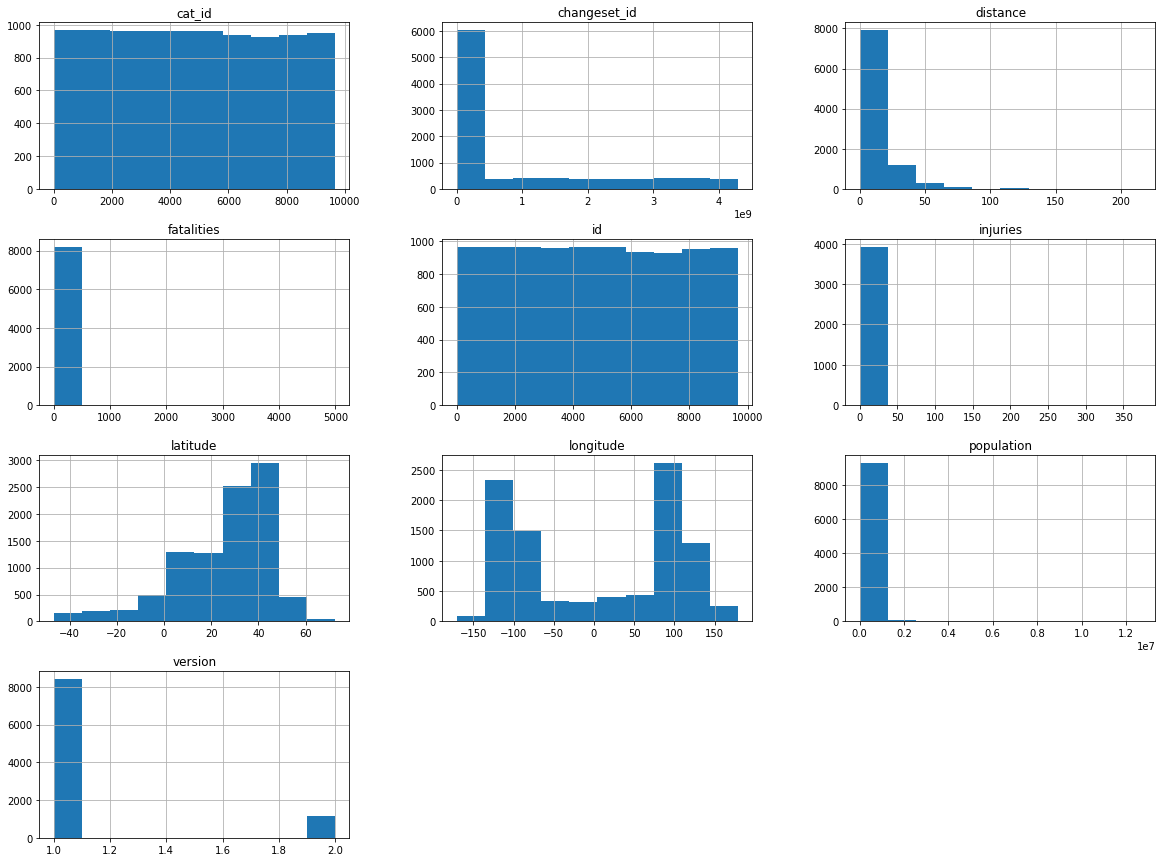

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data.hist(bins=10, figsize=(20,15))
plt.show()

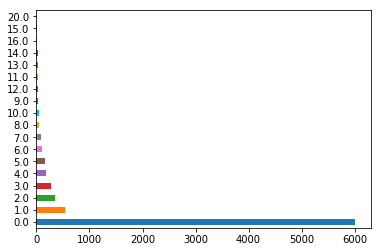

In [9]:
raw_data["fatalities"].value_counts()[:20].plot(kind='barh')

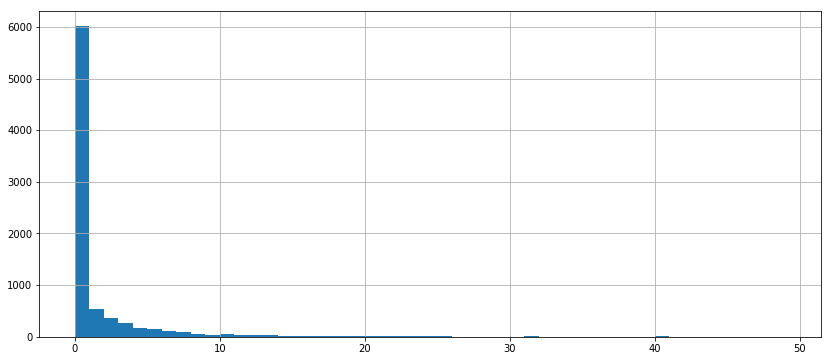

In [10]:
bin_values = np.arange(start=0, stop=50, step=1)
raw_data["fatalities"].hist(bins=bin_values, figsize=[14,6])

In [11]:
new_data = raw_data[["fatalities", "landslide_size", "trigger", "hazard_type", "country", "population", "latitude", "longitude"]]

In [12]:
new_data = new_data.dropna(axis=0, how='any') # dropping all data points that has NaN in new_data

In [13]:
df = pd.DataFrame(new_data)

In [14]:
df = df.sample(100) # Randomly selecting 100 samples 

In [15]:
df.head()

,fatalities,landslide_size,trigger,hazard_type,country,population,latitude,longitude
943,1.0,Medium,Unknown,landslide,India,40283.0,30.8950,77.0890
3594,0.0,Small,Downpour,landslide,China,0.0,29.1935,119.7975
3240,0.0,Medium,Rain,landslide,United States,1009.0,43.3197,-73.9295
2402,0.0,Medium,Downpour,landslide,Italy,887.0,40.6378,14.6074
5707,0.0,Medium,Downpour,landslide,United Kingdom,25500.0,51.2934,-0.1532


In [16]:
df.loc[df.landslide_size == 'medium', 'landslide_size'] = 'Medium'

In [17]:
df.loc[df.landslide_size == 'small', 'landslide_size'] = 'Small'

In [18]:
import string
df.landslide_size = df.landslide_size.apply(string.capitalize) 
    # Capitalizing the string since there were some landslide_size written as 'small', 'medium', and 'large 

In [19]:
print(df.landslide_size.value_counts()) # counting the number of data based on landlide_size

Medium    69
Small     21
Large     10
Name: landslide_size, dtype: int64


In [20]:
# df.to_csv('modified_dataset.csv')